<center>
<h1><b>Mario Ferreyra | Emiliano Kokic</b></h1>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Resolucion de Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
print(pd)

<module 'pandas' from '/home/mferreyra/.virtualenvs/diplodatos-ayv/lib/python3.6/site-packages/pandas/__init__.py'>


In [4]:
#dataset = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
#                      encoding='utf8')
dataset = pd.read_csv('/home/mferreyra/Desktop/DiploDatos_2018/Analisis_Visualizacion_Datos/Datasets/violencia-institucional-2018-01.csv',
                      encoding='utf8')

In [5]:
dataset[:5]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN
3,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Comisaría,NaN,"Mala alimentación, Malas condiciones de alojam...",NaN,Alejamiento de vínculos,NaN,NaN,NaN,Policia Provincial,Comisaria Nº 3 de Rafael Castillo,NaN
4,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [7]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Resolucion de Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

/home/mferreyra/.virtualenvs/diplodatos-ayv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

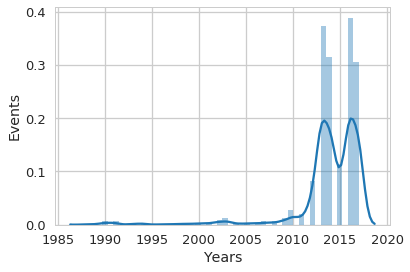

In [8]:
ax = sns.distplot(dataset.year.dropna(), norm_hist=True)
ax.set_xlabel("Years")
ax.set_ylabel("Events")
ax.plot()

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

In [9]:
fdp = dataset.year.dropna()
fdp = fdp.value_counts(normalize=True)
fdp = fdp.sort_index()
fdp

1988.0    0.000760
1989.0    0.000760
1990.0    0.003799
1991.0    0.003799
1993.0    0.001520
1994.0    0.002280
1996.0    0.000760
1997.0    0.000760
1998.0    0.001520
1999.0    0.001520
2000.0    0.002280
2001.0    0.002280
2002.0    0.005319
2003.0    0.006839
2004.0    0.001520
2005.0    0.002280
2006.0    0.002280
2007.0    0.003799
2008.0    0.003799
2009.0    0.007599
2010.0    0.015957
2011.0    0.012158
2012.0    0.047112
2013.0    0.216565
2014.0    0.183131
2015.0    0.066109
2016.0    0.225684
2017.0    0.177812
Name: year, dtype: float64

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.  
¿Son ambos gráficos iguales?  
¿Cuál considera que es más útil?

Consideramos el segundo grafico (de barras) mas util, siempre que se quiera 
visualizar con mayor detalle la frecuencia de eventos ocurridos en cada year particular.

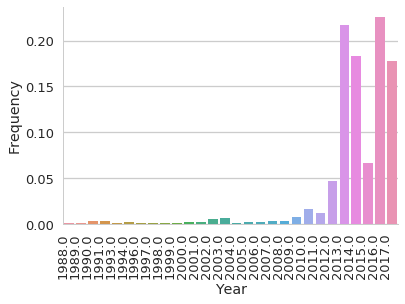

In [10]:
ax = sns.barplot(data=fdp.to_frame().reset_index(), x='index', y='year')
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

sns.despine()

* ¿A qué se debe la forma de la distribución?  
¿Qué tendencia muestra?
¿Ha aumentado la violencia institucional en los últimos años?

Muestra justamente que los casos de violencia institucional han aumentado en el ultimo tiempo.
De manera notable en 2013 y 2016.

* Calcular la función de distribución acumulada de la variable Y y graficarla.  
¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

In [11]:
# Funcion de distribucion acumulada de Y = "año en el que ocurrio"
def Fda(x, fdp):
    cumulative = 0
    for year, prob in fdp.items():
        if (year <= x):
            cumulative += prob
    return cumulative

In [12]:
df_fdp = fdp.to_frame()
x = df_fdp.index.values

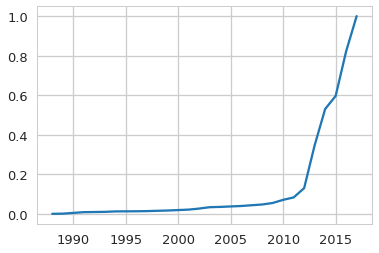

In [13]:
# Forma 1 de graficar funcion de distribucion acumulada (f.d.a.)
y1 = [Fda(i, fdp) for i in x]
plt.plot(x, y1)

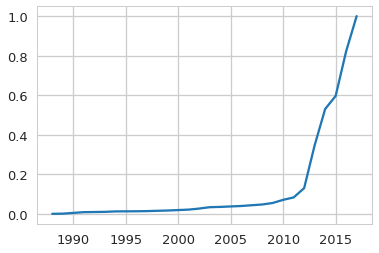

In [14]:
# Forma 2 de graficar funcion de distribucion acumulada (f.d.a.)
# https://stackoverflow.com/questions/15889131/how-to-find-the-cumulative-sum-of-numbers-in-a-list
y2 = np.cumsum(df_fdp.values)
plt.plot(x, y2)

In [15]:
# Nota: El ultimo cambio de gobierno se produjo en el año 2015 (Mauricio Macri)
# Prob de que se haya dado un acto de violencia antes del último cambio de gobierno.
Fda(2015, fdp)

0.5965045592705167

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

Notar que en todo el dataset tenemos un total de 1439 filas pero en algunas no hay datos (NaN), por lo que quitando aquellas vacias (NaN) nos quedan 1316 filas.  
Eliminamos unas 123 filas correspondientes al 8.55%, es decir, nos quedamos con el 91.45% de las filas.  
Como no pocos los datos que eliminamos, no afectan de forma significativa a los calculos que estamos haciendo.

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

In [16]:
fdp = dataset.provincia
fdp = fdp.dropna()
fdp = fdp.value_counts(normalize=True)
#fdp = fdp.sort_index()
fdp

Buenos Aires              0.693182
Ciudad de Buenos Aires    0.083097
Córdoba                   0.036932
Chubut                    0.026278
Chaco                     0.020597
Rio Negro                 0.019176
Neuquen                   0.014915
Santa Fe                  0.014205
Mendoza                   0.012074
Salta                     0.012074
Misiones                  0.007812
Santiago del Estero       0.007102
La Pampa                  0.007102
Tucuman                   0.007102
Formosa                   0.007102
Jujuy                     0.006392
Entre Rios                0.006392
La Rioja                  0.004261
Corrientes                0.003551
Santa Cruz                0.002841
San Luis                  0.002841
San Juan                  0.002131
Catamarca                 0.001420
Tierra del Fuego          0.001420
Name: provincia, dtype: float64

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

La informacion que falta agregar es la de la poblacion de cada provincia.  
Ya que podemos apreciar, mirando la tabla de frecuencias, que en Bs.As. hay mas casos de violencia institucional. Pero agregando la poblacion veremos que los datos se equiparan.

* Muestre la distribución de los eventos visualmente.  
¿Qué tipo de gráfico es más adecuado para mostrar esta información?

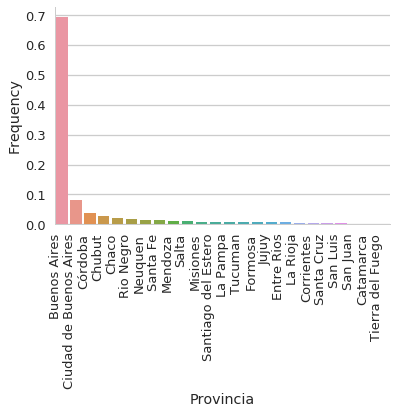

In [17]:
ax = sns.barplot(data=fdp.to_frame().reset_index(), x='index', y='provincia')
ax.set_xlabel("Provincia")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

sns.despine()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.  
¿Son eventos independientes?

Si, son eventos independientes.

In [18]:
#https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
df = dataset[['year', 'provincia']]
df = df.dropna()

cross = pd.crosstab(index=dataset['provincia'], columns=dataset['year'], normalize=True)
cross.head(10)

year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.000766,0.000000,0.002299,0.0,0.000766,0.000000,0.000000,0.000000,0.0,...,0.002299,0.003065,0.006130,0.006897,0.016092,0.150192,0.125670,0.037548,0.178544,0.143295
Catamarca,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000
Chaco,0.000000,0.000000,0.003065,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.005364,0.006130,0.002299,0.002299,0.002299,0.000766
Chubut,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.002299,0.000000,0.002299,0.004598,0.006897,0.001533,0.001533,0.005364
Ciudad de Buenos Aires,0.000766,0.000000,0.000000,0.001533,0.0,0.000000,0.000766,0.000766,0.000766,0.0,...,0.000766,0.003831,0.000766,0.001533,0.007663,0.017625,0.018391,0.007663,0.008429,0.009195
Corrientes,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000766,0.000766,0.000000
Córdoba,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.001533,0.002299,0.003065,0.003831,0.003065,0.009962,0.008429,0.007663
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.006130,0.000000,0.000000,0.000000
Formosa,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002299,0.002299,0.000766,0.000766,0.000766


* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.

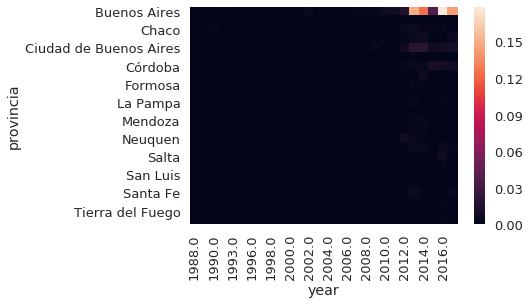

In [19]:
sns.heatmap(cross)

**Recordar lo siguiente**:  
$$
P(A | B) = \frac{P(A \cap B)}{P(B)} \hspace{1cm} si \hspace{0.2cm} P(B) > 0
$$

* Si A y B son independientes $\longrightarrow$ $P(A \cap B)$ = $P(A) * P(B)$
* Si A y B son independientes $\longrightarrow$ $P(A | B)$ = $P(A)$

In [20]:
# Veamos que las v.a. 'provincia' y 'year' son independientes

# Cada fila en el dataset original representa un evento de violencia institucional
total_events = dataset.shape[0]
print("Total de eventos de violencia institucional = {}".format(total_events))
print("")

df_prov = dataset['provincia'].dropna()
prov_events = df_prov.shape[0]
print("Total de eventos en todas las 'provincias' = {}".format(prov_events))

#print(df_prov)

P_prov = prov_events / total_events
print("P('provincia') = {}".format(P_prov))
print("")

year_vp = dataset['year'].dropna()
year_events = year_vp.shape[0]
print("Total de eventos en todos los years = {}".format(year_events))

P_year = year_events / total_events
print("P('year') = {}".format(P_year))
print("")

print("P('provincia') * P('year') = {}".format(P_prov * P_year))
print("")

df_prov_year = dataset.loc[:, ['provincia', 'year']]
df_prov_year = df_prov_year.dropna() # con NaN = (1439, 2) | sin NaN = (1305, 2)
prov_year_events = df_prov_year.shape[0]
print("Total de eventos en las 'provincias' y en los 'years' = {}".format(prov_year_events))

P_PROVinterYEAR = prov_year_events / total_events
print("P(provincia intersec year) = {}".format(P_PROVinterYEAR))
print("")

# ------------------------------------------------------------------- #
# Veamos que las v.a. 'provincia' y 'year' son independientes #
# ------------------------------------------------------------------- #
print("================================================================")
print("Supongamos que 'provincia' y 'year' son independientes ==> P('provincia' intersec 'year') = P('provincia') * P('year')")
print("Tenemos los siguientes datos:")
print("\t * P('provincia' intersec 'year') = {}".format(P_PROVinterYEAR))
print("\t * P('provincia') * P('year') = {}".format(P_prov * P_year))
print("Por lo que:")
print("\t   P('provincia' intersec 'year') = {} ~= {} = P('provincia') * P('year')".format(P_PROVinterYEAR, P_prov * P_year))
print("\t   Hay un error de {} ".format(np.absolute((P_prov * P_year) - P_PROVinterYEAR)))
print("\nPor lo que podemos concluir que 'provincia' y 'year' son independientes")
print("================================================================")

Total de eventos de violencia institucional = 1439

Total de eventos en todas las 'provincias' = 1408
P('provincia') = 0.9784572619874913

Total de eventos en todos los years = 1316
P('year') = 0.9145239749826268

P('provincia') * P('year') = 0.894822624583418

Total de eventos en las 'provincias' y en los 'years' = 1305
P(provincia intersec year) = 0.9068797776233496

Supongamos que 'provincia' y 'year' son independientes ==> P('provincia' intersec 'year') = P('provincia') * P('year')
Tenemos los siguientes datos:
	 * P('provincia' intersec 'year') = 0.9068797776233496
	 * P('provincia') * P('year') = 0.894822624583418
Por lo que:
	   P('provincia' intersec 'year') = 0.9068797776233496 ~= 0.894822624583418 = P('provincia') * P('year')
	   Hay un error de 0.0120571530399316 

Por lo que podemos concluir que 'provincia' y 'year' son independientes


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [21]:
fdp_Z = dataset.contexto1.dropna().value_counts(normalize=True)

df = fdp_Z.filter(items=['Penal / Complejo Penitenciario PROVINCIAL', 
                         'Penal / Complejo Penitenciario FEDERAL', 
                         'Comisaría',
                         'Centros de Detención Previos al Juicio (Alcaidia)',
                         'Centros de Detención Preventiva',
                         'Instalaciones de la Gendarmería Nacional',
                         'Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)'])

print(df)

# Probabilidad:
print("")
prob = np.sum(df.values)
print('* P(hecho sea producido en una dependencia de una fuerza de seguridad) = {}'.format(prob))

Penal / Complejo Penitenciario PROVINCIAL                              0.365343
Penal / Complejo Penitenciario FEDERAL                                 0.321300
Comisaría                                                              0.091697
Centros de Detención Previos al Juicio (Alcaidia)                      0.011552
Centros de Detención Preventiva                                        0.004332
Instalaciones de la Gendarmería Nacional                               0.002888
Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)    0.001444
Name: contexto1, dtype: float64

* P(hecho sea producido en una dependencia de una fuerza de seguridad) = 0.7985559566787004


## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia física’:

* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

**Recordar lo siguiente**:  

Sea:  
* N = existió violencia psíquica
* M = existió violencia física

$$
P(N | M) = \frac{P(N \cap M)}{P(M)} \hspace{1cm} si \hspace{0.2cm} P(M) > 0
$$

* Si N y M son independientes $\longrightarrow$ $P(N \cap M)$ = $P(N) * P(M)$
* Si N y M son independientes $\longrightarrow$ $P(N | M)$ = $P(N)$

In [22]:
# Cada fila en el dataset original representa un evento de violencia institucional
total_events = dataset.shape[0]
print("Total de eventos de violencia institucional = {}".format(total_events))
print("")

df_vf = dataset['violencia_fisica'].dropna()
vf_events = df_vf.shape[0]
print("Total de eventos donde existio violencia fisica = {}".format(vf_events))

P_M = vf_events / total_events
print("P(M) = {}".format(P_M))
print("")

df_vp = dataset['violencia_psiquica'].dropna()
vp_events = df_vp.shape[0]
print("Total de eventos donde existio violencia psiquica = {}".format(vp_events))

P_N = vp_events / total_events
print("P(N) = {}".format(P_N))
print("")

print("P(N) * P(M) = {}".format(P_N * P_M))
print("")

df_vf_vp = dataset.loc[:, ['violencia_fisica', 'violencia_psiquica']]
df_vf_vp = df_vf_vp.dropna() # con NaN = (1439, 2) | sin NaN = (126, 2)
vf_vp_events = df_vf_vp.shape[0]
print("Total de eventos donde existio violencia fisica y violencia psiquica = {}".format(vf_vp_events))

P_NinterM = vf_vp_events / total_events
print("P(N intersec M) = {}".format(P_NinterM))
print("")

print("P(N | M) = {}".format(P_NinterM / P_M))
print("")

# ---------------------------------------------- #
# Veamos que N y M no son eventos independientes #
# ---------------------------------------------- #
print("================================================================")
print("Supongamos que N y M son independientes ==> P(N intersec M) = P(N) * P(M)")
print("Tenemos los siguientes datos:")
print("\t * P(N intersec M) = {}".format(P_NinterM))
print("\t * P(N) * P(M) = {}".format(P_N * P_M))
print("Por lo que:")
print("\t   P(N intersec M) = {} != {} = P(N) * P(M)".format(P_NinterM, P_N * P_M))
print("\nPor lo tanto N y M no son eventos independientes")
print("================================================================")

Total de eventos de violencia institucional = 1439

Total de eventos donde existio violencia fisica = 590
P(M) = 0.4100069492703266

Total de eventos donde existio violencia psiquica = 487
P(N) = 0.33842946490618486

P(N) * P(M) = 0.13875843244937391

Total de eventos donde existio violencia fisica y violencia psiquica = 126
P(N intersec M) = 0.08756080611535788

P(N | M) = 0.2135593220338983

Supongamos que N y M son independientes ==> P(N intersec M) = P(N) * P(M)
Tenemos los siguientes datos:
	 * P(N intersec M) = 0.08756080611535788
	 * P(N) * P(M) = 0.13875843244937391
Por lo que:
	   P(N intersec M) = 0.08756080611535788 != 0.13875843244937391 = P(N) * P(M)

Por lo tanto N y M no son eventos independientes


* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?

Las conclusiones que observamos son las siguientes:  
* Hay mas probabilidad de que ocurra un evento de violencia fisica (M) que de violencia psiquica (N)
* Por otro lado vemos que la probabilidad de que ocurra un evento de violencia psiquica dado que ocurrio un evento de violencia fisica esta cerca del 22%

* ¿Podemos concluir en que son eventos independientes dadas las muestras?

Notar que:  
* P(N) * P(M) = 0.13875843244937391 es distinto a
* P(N $\cap$ M)= 0.046560111188325225  

Por lo que: P(N) * P(M) es distinto a P(N $\cap$ M)  
Entonces por definicion, las v.a. N y M no son independientes. 